In [95]:
### importing all the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import janitor

In [96]:
%matplotlib inline

In [97]:
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv("./datasets/Customer-Churn-Records.csv")

## Data Information

In [99]:
##displaying the first five head of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [100]:
##displaying the  tail of the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [101]:
## checking the shape of the data
df.shape

(10000, 18)

In [102]:
## displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [103]:
## checking the null values present in the dataset
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### since we do not have any missing values here.

In [104]:
## cleans the column names
df = df.clean_names(case_type="lower")

In [105]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Since customer id and row number do not provide any significance in this analysis we can go ahead and drop them


In [106]:
df = df.drop(['rownumber', 'customerid'], axis=1)

## Explorative Data Analysis

In [107]:
## Lets seperate numerical and categorical features

## storing categorical features in categorical_feature variables
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
## storing numerical features in numerical_feature variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [108]:
print(f'The categorical features from the DataSet: {categorical_features}')

The categorical features from the DataSet: ['surname', 'geography', 'gender', 'card_type']


In [109]:
print(f'The numerical features from the DataSet: {numerical_features}')

The numerical features from the DataSet: ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited', 'complain', 'satisfaction_score', 'point_earned']


### Our target variable is Exited which is binary class. Lets create a pie chart and a bar chart to better understand the distribution present in the target variable

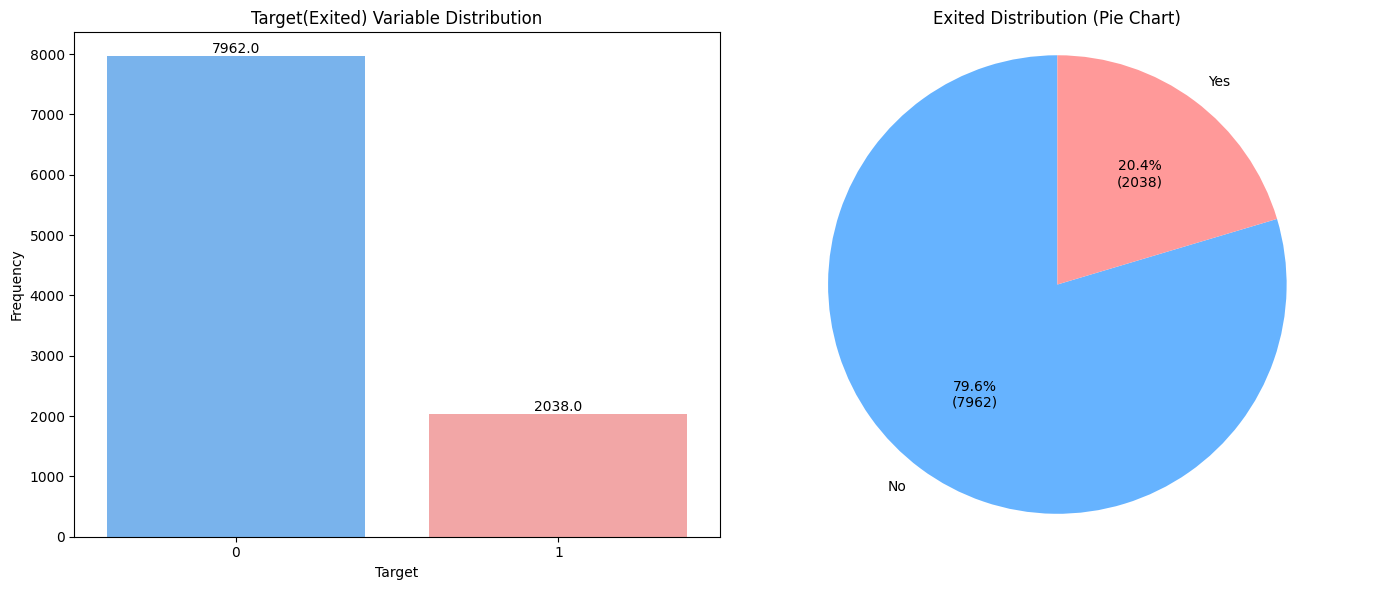

In [110]:
## Prepare data
counts = df['exited'].value_counts()
sizes = counts.values
colors = ['#66b3ff', '#ff9999']
total = sum(sizes)

## create subpl;ots 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

## creating barchart
sns.countplot(x='exited', data=df, palette=colors, ax=ax1)
ax1.set_title("Target(Exited) Variable Distribution")
ax1.set_xlabel("Target")
ax1.set_ylabel("Frequency")

## add count lables on the top of the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=10)



## create pie chart

ax2.pie(sizes, labels=['No','Yes'],
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct * total / 100.0))})",
        startangle=90,
        colors=colors[:len(sizes)])
ax2.set_title("Exited Distribution (Pie Chart)")
ax2.axis('equal')

# Display the plots
plt.tight_layout()
plt.show()

#### From the above chart we can firmly confirm that the data is unbalacnced. Where minority of the people are not leaving. This might create a biasness during downstream analysis and Machine Learning Outcome.
### Also we can see 20.4% of people are leaving our bank which is huge blow for the company. We need to dive deeper and try to find what is the reason and try to retain users.


#### Lets check what percentage of people leaving our company have what credit score. so we can see if people with actually good credit are leaving or not.

## Credit Score

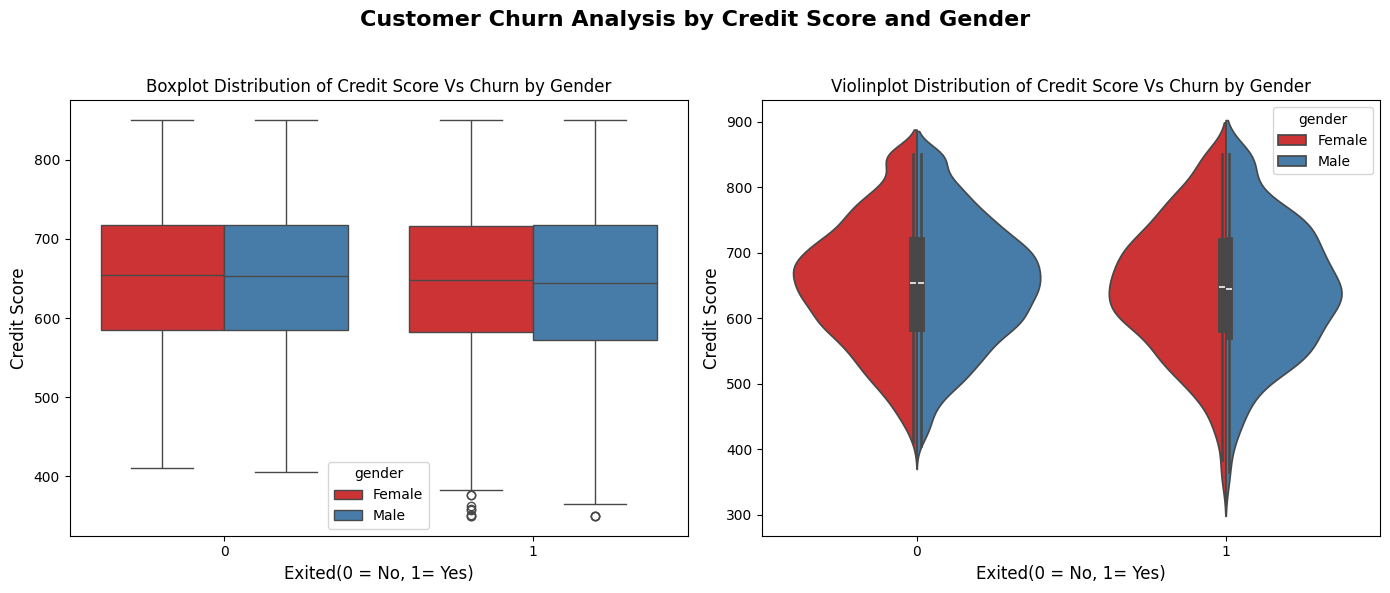

In [133]:
## create subplots for box and violin plot
fig, ax = plt.subplots(1,2, figsize=(14, 6))

### creating box plot

sns.boxplot(data= df, x='exited', y="creditscore", hue="gender", ax= ax[0], palette='Set1')
ax[0].set_title("Boxplot Distribution of Credit Score Vs Churn by Gender")
ax[0].set_xlabel("Exited(0 = No, 1= Yes)", fontsize=12)
ax[0].set_ylabel("Credit Score", fontsize=12)
ax[0].legend(title='gender')

## creating violin plot

sns.violinplot(data= df, x='exited', y="creditscore", hue="gender", split=True, ax=ax[1],palette='Set1')
ax[1].set_title("Violinplot Distribution of Credit Score Vs Churn by Gender")
ax[1].set_xlabel("Exited(0 = No, 1= Yes)", fontsize=12)
ax[1].set_ylabel("Credit Score", fontsize=12)
ax[1].legend(title='gender')

# Shared title
plt.suptitle("Customer Churn Analysis by Credit Score and Gender", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### From the above box plot and violin plot we can see that specially female who have low credit score have churn from the bank. The number of low-credit female exitting the bank is higher than males who  have low credit score. However, median of people who churn are almost same. 
### From the violin plot we can see people who churn and non churn are similar. We can conclude that credit score is not a strong factor to determine that credit score is the only sole factor for churn

In [134]:
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## lets see the age distribution of the people

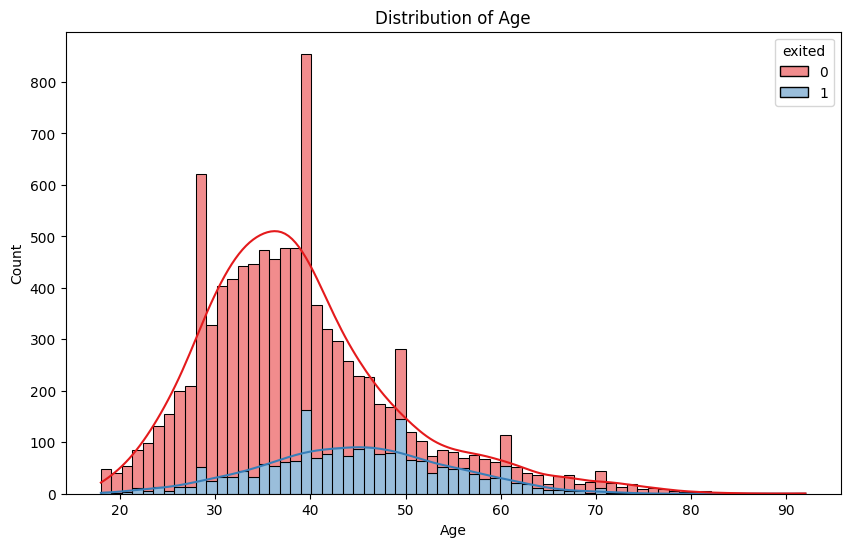

In [155]:
plt.figure(figsize=(10,6))
ax = sns.histplot( data=df,x='age', hue="exited", kde=True, palette='Set1', multiple="stack")  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### The above histogram visualize the age group distribution of the customer who churn and who did not. Most of the customer belong to 30-40 years of age category. 
### We can see from the non-churn category, it is skewed to right meaning we have high number of people from age group 
### Also from the churn category we can see that it is quitely normally distributed. 

In [156]:
print('rakja')

rakja
